In [1]:
# Quick example of simple linear regression

import pandas as pd

In [2]:
df = pd.DataFrame({
    "LivingArea":[300,356,501,407,950,782,664,456,673,821,1024,900,512,551,510,625,718,850],
    "Price":[100,120,180,152,320,260,210,150,245,300,390,305,175,185,160,224,280,299]
})

In [3]:
#Visualing these data points using matplotlib

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [4]:
rcParams["figure.figsize"] = 14,8
rcParams["axes.spines.top"] = False
rcParams["axes.spines.right"] = False

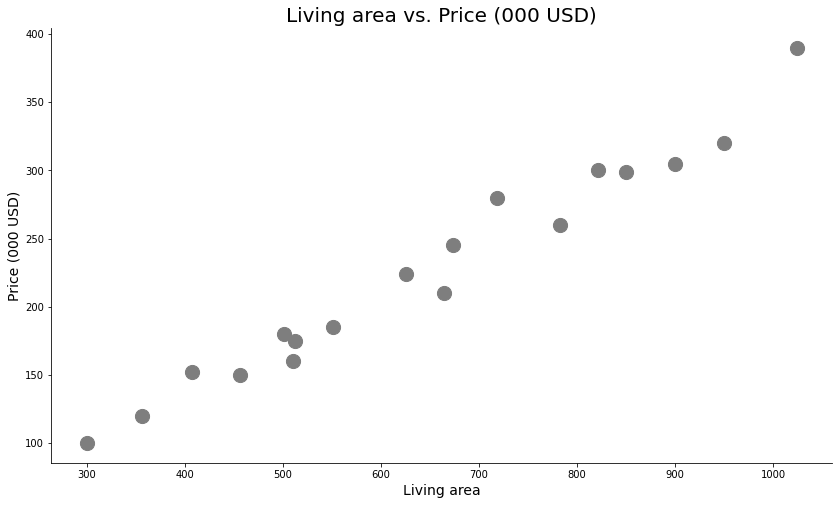

In [5]:
#creating a 2d scatter plot

plt.scatter(df["LivingArea"],df["Price"],color="#7e7e7e",s=200)
plt.title("Living area vs. Price (000 USD)",size=20)
plt.xlabel("Living area",size=14)
plt.ylabel("Price (000 USD)",size=14)
plt.show()

In [6]:
#Training the model using scikit-learn's LinearRegression module

from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()
model.fit(df[["LivingArea"]],df[["Price"]])
preds = model.predict(df[["LivingArea"]])
df["Predicted"] = preds

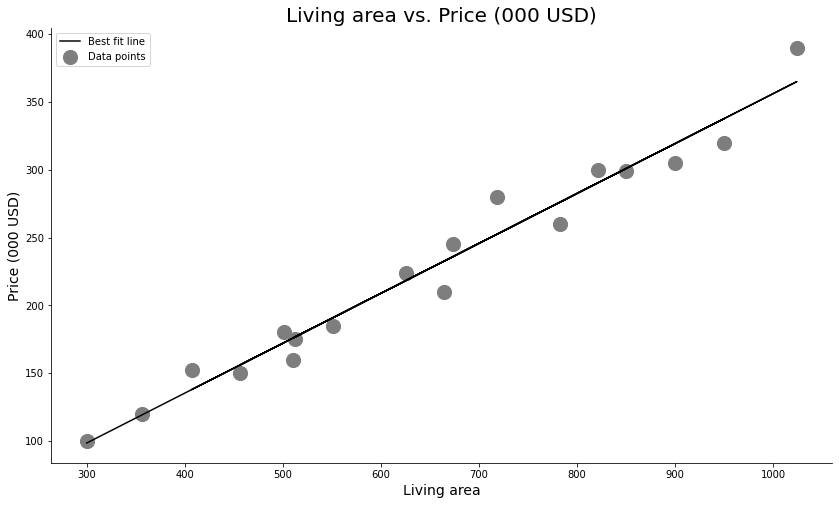

In [8]:
#Plotting the entire dataset and adding a line to represent the line of best fit

plt.scatter(df["LivingArea"],df["Price"],color="#7e7e7e",s=200,label="Data points")
plt.plot(df["LivingArea"],df["Predicted"],color="#040404",label="Best fit line")
plt.title("Living area vs. Price (000 USD)",size=20)
plt.xlabel("Living area",size=14)
plt.ylabel("Price (000 USD)",size=14)
plt.legend()
plt.show()

In [9]:
#Making a prediction of house with living space 1000 square meters

model.predict([[1000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[356.18038708]])

In [10]:
#Calculating the R2(goodness of fit) and RMSE

import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
rmse = lambda y,ypred: np.sqrt(mean_squared_error(y,ypred))
model_r2 = r2_score(df["Price"],df["Predicted"])
model_rmse = rmse(df["Price"],df["Predicted"])
print(f"R2 score: {model_r2:.2f}")
print(f"RMSE: {model_rmse:.2f}")


R2 score: 0.97
RMSE: 13.88


# ------------------------------------------------------------------------------

# Classification example

In [11]:
df = pd.DataFrame({
    "Radius":[0.3,0.1,1.7,0.4,1.9,2.1,0.25,0.4,2.0,1.5,0.6,0.5,1.8,0.25],
    "Class":[0,0,1,0,1,1,0,0,1,1,0,0,1,0]
})

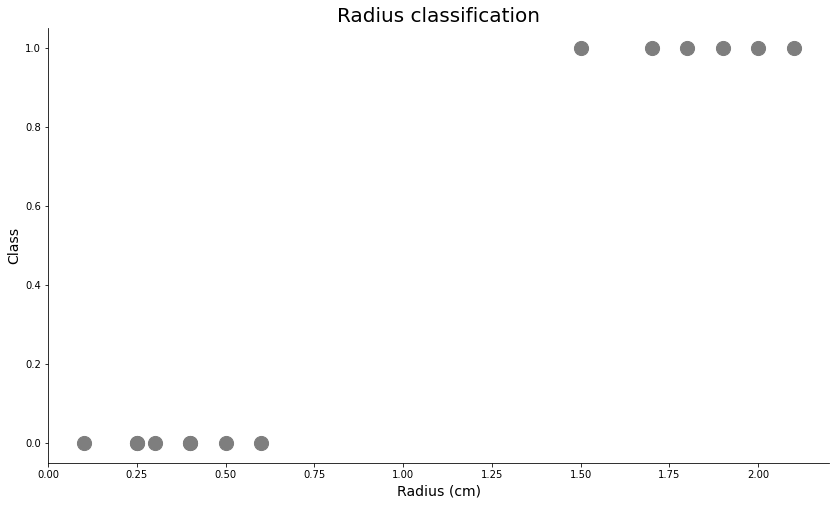

In [12]:
# using a scatter plot to show the datapoints

plt.scatter(df["Radius"],df["Class"],color="#7e7e7e",s=200)
plt.title("Radius classification",size=20)
plt.xlabel("Radius (cm)",size=14)
plt.ylabel("Class",size=14)
plt.show()

In [13]:
#using logistic regression to classify the target variable class

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(df[["Radius"]],df["Class"])
preds = model.predict(df[["Radius"]])
df["Predicted"] = preds

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 

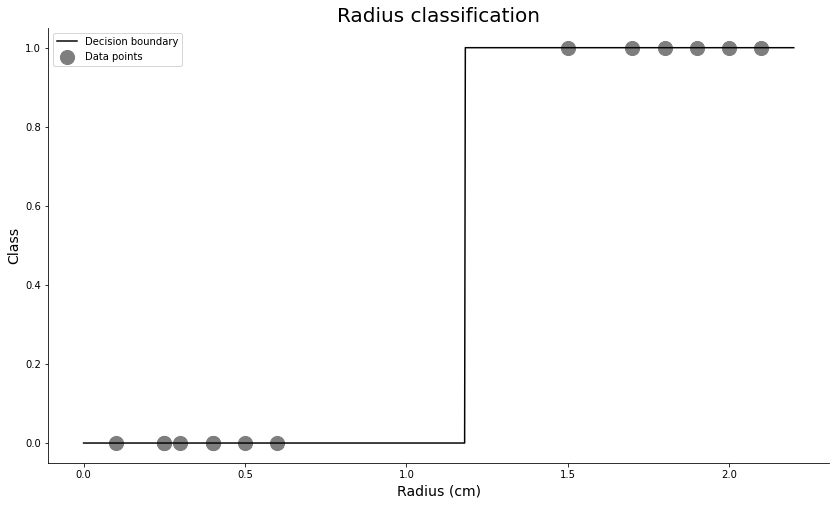

In [14]:
#using the above model to make predictions using np.linspace and plotting a line to visualize the decision boundary of the model

xs = np.linspace(0,df["Radius"].max()+0.1,1000)
ys = [model.predict([[x]]) for x in xs]
plt.scatter(df["Radius"],df["Class"],color="#7e7e7e",s=200,label="Data points")
plt.plot(xs,ys,color="#040404",label="Decision boundary")
plt.title("Radius classification",size=20)
plt.xlabel("Radius (cm)",size=14)
plt.ylabel("Class",size=14)
plt.legend()
plt.show()

In [15]:
#Creating a confusion matrix to view how the model did

from sklearn.metrics import confusion_matrix
confusion_matrix(df["Class"],df["Predicted"])

array([[8, 0],
       [0, 6]])